In [39]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [40]:
lim = 15

In [63]:
path_org = 'C:/Users/Max/Documents/image_data/malimg_paper_dataset_imgs'
path_gen = 'C:/Users/Max/Documents/image_data/malimg-cgan-v025-rightsize'
path_gen2 = 'C:/Users/Max/Documents/image_data/malimg-cgan-local-v011'
path_gen3 = 'C:/Users/Max/Documents/image_data/malimg-cgan-local-v010'


In [73]:
imgs_org = np.array([])
org_dir_order = []
label_org = np.array([])
for dirs, root, file in os.walk(path_org):
    if file and "Allaple.A" not in dirs:
        img_dir = []
        fam_name = dirs[len(path_org)+1:]
        org_dir_order.append(fam_name)
        for count, f in enumerate(file):
            img_dir.append(os.path.join(dirs,f))
        
        for i in range(lim):
            n = randint(0,len(img_dir)-1)
            img_org = cv2.imread(img_dir[n], 0)
            img_org = cv2.resize(img_org, (64,64))
            img_org = np.array(img_org)
            imgs_org = np.append(imgs_org, img_org)
            
            label_org = np.append(label_org, fam_name)
            
            
imgs_org = imgs_org.reshape(int(imgs_org.shape[0]/(64**2)),64,64,1)


In [74]:
imgs_gen = np.array([])
gen_dir_order = []
label_gen_all = np.array([])
label_gen = np.array([])

for dirs, root, file in os.walk(path_gen):

    if file and "Allaple.A" not in dirs:
        img_dir = []
        fam_name = dirs[len(path_gen)+1:]
        gen_dir_order.append(fam_name)
        for count, f in enumerate(file):
            img_dir.append(os.path.join(dirs,f))
        
        for i in range(lim):
            n = randint(0,len(img_dir)-1)
            img_gen = cv2.imread(img_dir[n], 0)
            img_gen = cv2.resize(img_gen, (64,64))
            img_gen = np.array(img_gen)
            imgs_gen = np.append(imgs_gen, img_gen)
            
            label_gen = np.append(label_gen, fam_name)
        
                
imgs_gen = imgs_gen.reshape(int(imgs_gen.shape[0]/(64**2)),64,64,1)

In [75]:
imgs_gen2 = np.array([])
gen_dir_order2 = []
label_gen2 = np.array([])

for dirs, root, file in os.walk(path_gen2):
    
    if file and "Allaple.A" not in dirs:
        img_dir = []
        fam_name = dirs[len(path_gen2)+1:]
        gen_dir_order2.append(fam_name)
        for count, f in enumerate(file):
            img_dir.append(os.path.join(dirs,f))
        
        for i in range(lim):
            n = randint(0,len(img_dir)-1)
            img_gen = cv2.imread(img_dir[n], 0)
            img_gen = cv2.resize(img_gen, (64,64))
            img_gen = np.array(img_gen)
            imgs_gen2 = np.append(imgs_gen2, img_gen)
            
            label_gen2 = np.append(label_gen2, fam_name)
            
            
imgs_gen2 = imgs_gen2.reshape(int(imgs_gen2.shape[0]/(64**2)),64,64,1)

In [76]:
imgs_gen3 = np.array([])
gen_dir_order3 = []
label_gen3 = np.array([])

for dirs, root, file in os.walk(path_gen3):
    
    if file and "Allaple.A" not in dirs:
        img_dir = []
        fam_name = dirs[len(path_gen3)+1:]
        gen_dir_order3.append(fam_name)
        for count, f in enumerate(file):
            img_dir.append(os.path.join(dirs,f))
        
        for i in range(lim):
            n = randint(0,len(img_dir)-1)
            img_gen = cv2.imread(img_dir[n], 0)
            img_gen = cv2.resize(img_gen, (64,64))
            img_gen = np.array(img_gen)
            imgs_gen3 = np.append(imgs_gen3, img_gen)
            
            label_gen3 = np.append(label_gen3, fam_name)
            
imgs_gen3 = imgs_gen3.reshape(int(imgs_gen3.shape[0]/(64**2)),64,64,1)

In [77]:
if gen_dir_order == org_dir_order:
    print("Folder order is the same. You are good to continue")
else: 
    print("STOP! Folder order is not the same!")

Folder order is the same. You are good to continue


In [78]:
pick_arr = []
for i in range(len(gen_dir_order)):
    pick_arr.append(f"{gen_dir_order[i]}: ({i})")

['Adialer.C: (0)', 'Agent.FYI: (1)', 'Allaple.L: (2)', 'Alueron.gen!J: (3)', 'Autorun.K: (4)', 'C2LOP.gen!g: (5)', 'C2LOP.P: (6)', 'Dialplatform.B: (7)', 'Dontovo.A: (8)', 'Fakerean: (9)', 'Instantaccess: (10)', 'Lolyda.AA1: (11)', 'Lolyda.AA2: (12)', 'Lolyda.AA3: (13)', 'Lolyda.AT: (14)', 'Malex.gen!J: (15)', 'Obfuscator.AD: (16)', 'Rbot!gen: (17)', 'Skintrim.N: (18)', 'Swizzor.gen!E: (19)', 'Swizzor.gen!I: (20)', 'VB.AT: (21)', 'Wintrim.BX: (22)', 'Yuner.A: (23)']
Which family do you want to inspect? 15


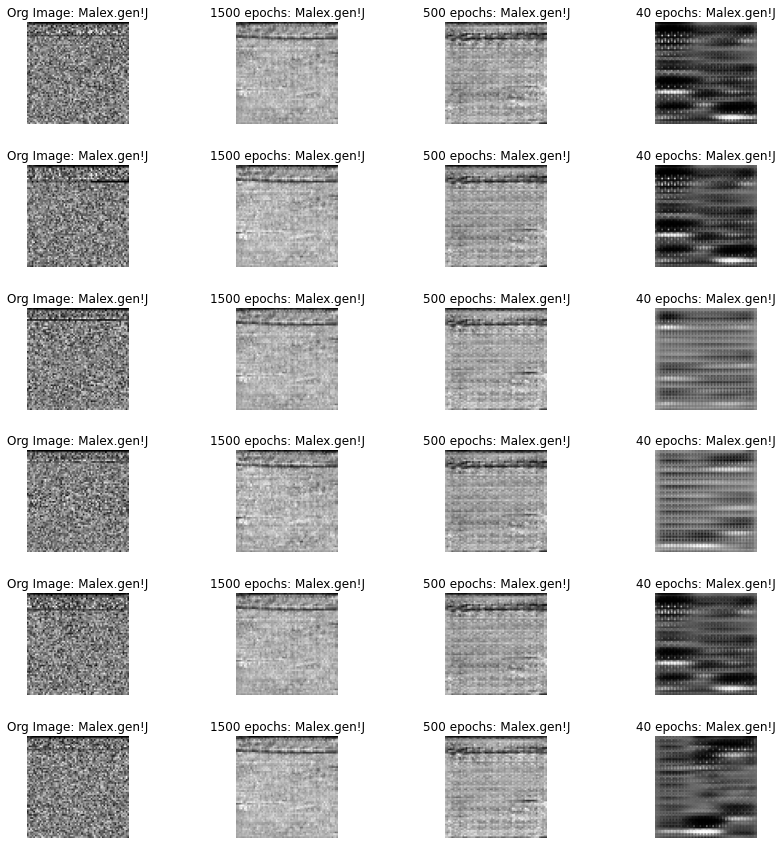

In [83]:
fig, axes = plt.subplots(6,4, figsize=(15,15))
plt.subplots_adjust(wspace=0, hspace=0.4)

print(pick_arr)
ip = input("Which family do you want to inspect? ")
ip = int(ip)

for i in range(6):
    ax1, ax2, ax3, ax4 = axes[i]
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    
    j = np.where(label_gen == gen_dir_order[ip])[0][0] + i
    ax1.imshow(imgs_org[j], cmap='gray')
    ax1.set_title("Org Image: {fam_name}".format(fam_name = label_org[j]))

    ax2.imshow(imgs_gen[j], cmap = 'gray')
    ax2.set_title(f"1500 epochs: {label_gen[j]}")
    
    ax3.imshow(imgs_gen2[j], cmap = 'gray')
    ax3.set_title(f"500 epochs: {label_gen2[j]}")
    
    ax4.imshow(imgs_gen3[j], cmap = 'gray')
    ax4.set_title(f"40 epochs: {label_gen3[j]}")